# Author: ddukic

In [1]:
import numpy as np
import wandb
import sys

sys.path.append("../")
import matplotlib.pyplot as plt

%matplotlib inline

api = wandb.Api()


def fetch_run_summary(run_url):
    run_key = run_url.split("/")[-1]
    return api.run("ddukic/generative-ie-paper/" + run_key).summary

In [2]:
def plot_metric(
    metric, url_encoder, url_decoder, url_decoder_unlock, title, bottom=None, top=None
):
    def get_data(url):
        summary_metric_avg = {
            k.split("_", 3)[-1]: v
            for k, v in fetch_run_summary(url)["all_metrics"].items()
            if metric + "_avg" in k
        }

        summary_metric_stdev = {
            k.split("_", 3)[-1]: v
            for k, v in fetch_run_summary(url)["all_metrics"].items()
            if metric + "_stdev" in k
        }

        metric_avg = [
            y[1]
            for y in sorted(
                summary_metric_avg.items(),
                key=lambda x: [int(x[0].split("_")[idx]) for idx in [0, 2, -1]],
            )
        ]
        metric_stdev = [
            y[1]
            for y in sorted(
                summary_metric_stdev.items(),
                key=lambda x: [int(x[0].split("_")[idx]) for idx in [0, 2, -1]],
            )
        ]

        return np.array(metric_avg), np.array(metric_stdev)

    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["figure.figsize"] = (5, 3)
    plt.gca().set_facecolor("#F9F9F9")

    encoder_means, encoder_stds = get_data(url_encoder)
    decoder_means, decoder_stds = get_data(url_decoder)
    decoder_unlock_means, decoder_unlock_stds = get_data(url_decoder_unlock)

    x = np.arange(len(encoder_means))

    plt.plot(
        x, encoder_means, label="Encoder", color="blue", linestyle="dashed", marker="."
    )
    plt.fill_between(
        x,
        encoder_means - encoder_stds,
        encoder_means + encoder_stds,
        color="orange",
        alpha=0.3,
    )
    plt.plot(
        x,
        decoder_means,
        label="Decoder Mask",
        color="red",
        linestyle="dashed",
        marker=".",
    )
    plt.fill_between(
        x,
        decoder_means - decoder_stds,
        decoder_means + decoder_stds,
        color="orange",
        alpha=0.3,
    )
    plt.plot(
        x,
        decoder_unlock_means,
        label="Decoder Unmask",
        color="green",
        linestyle="dashed",
        marker=".",
    )
    plt.fill_between(
        x,
        decoder_unlock_means - decoder_unlock_stds,
        decoder_unlock_means + decoder_unlock_stds,
        color="orange",
        alpha=0.3,
    )
    plt.grid(linestyle="dotted", linewidth=0.5)

    plt.yticks(np.arange(0.0, 1.0, 0.05))

    plt.margins(x=0.025, y=0.025)

    if bottom is not None and top is not None:
        plt.ylim((bottom, top))

    plt.title(title)
    plt.xlabel("Language Modeling Checkpoint")
    plt.ylabel(metric.upper())
    plt.legend()
    plt.show()

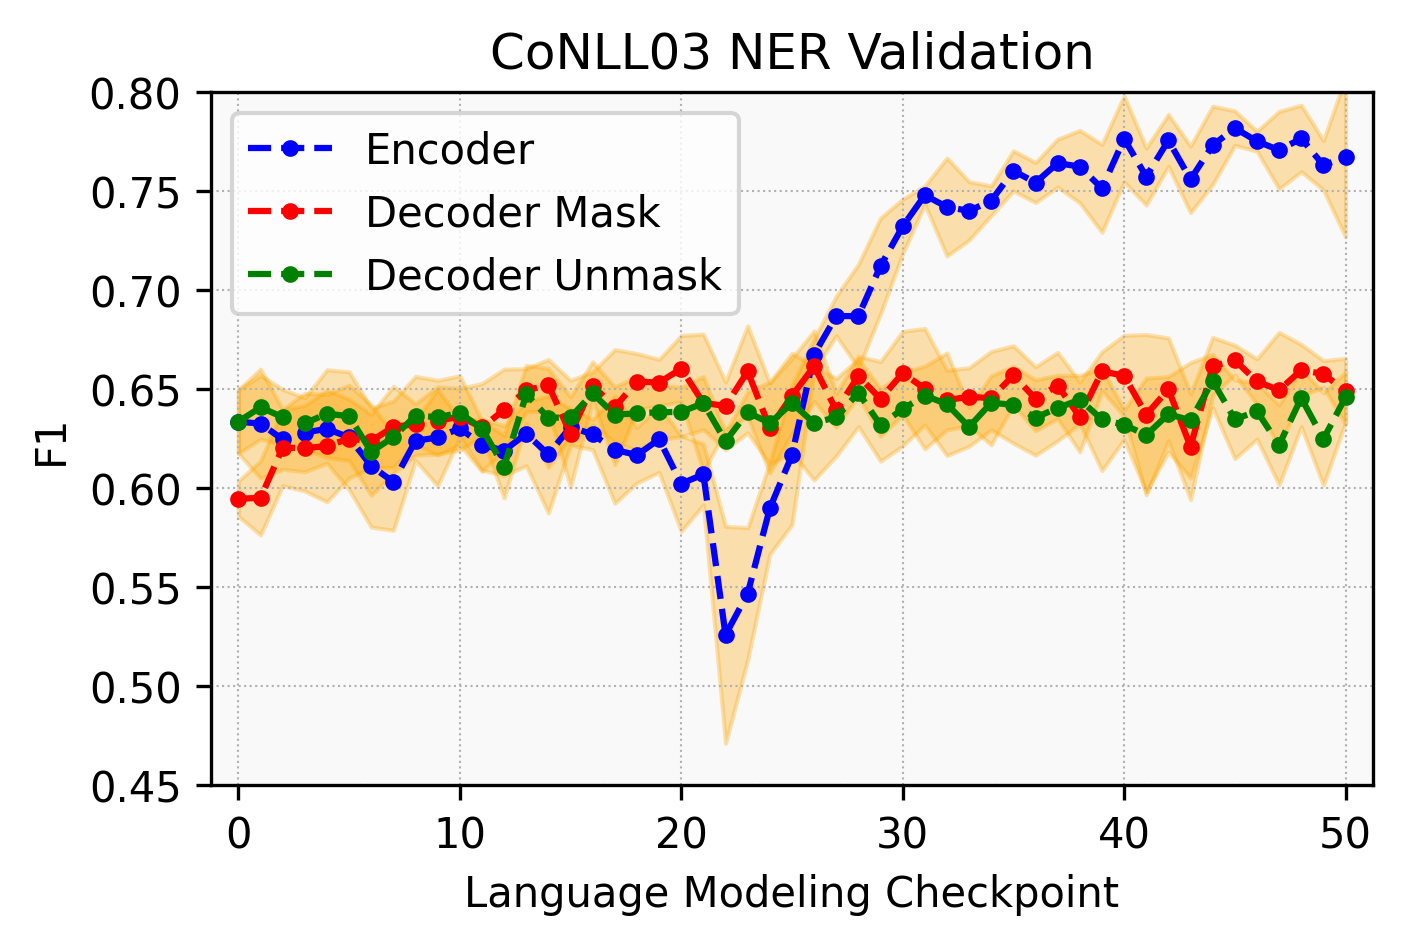

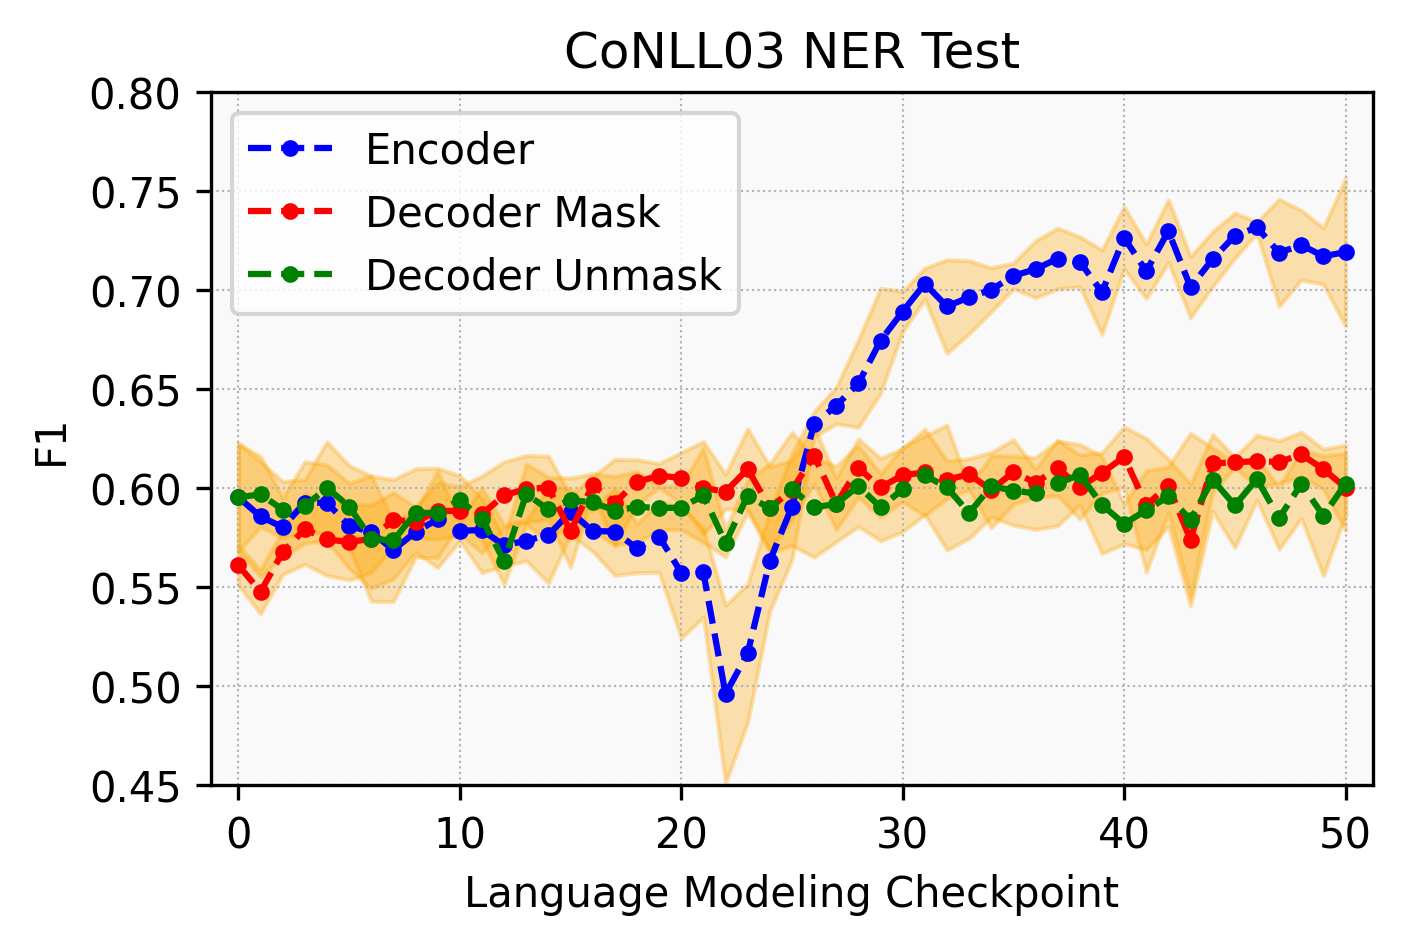

In [3]:
plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/0dyqo0o7",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/3gha4eln",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/snhwpwbe",
    title="CoNLL03 NER Validation",
    bottom=0.45,
    top=0.8,
)

plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/35gr6aro",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/35aapqjr",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/3ya8lw5y",
    title="CoNLL03 NER Test",
    bottom=0.45,
    top=0.8,
)

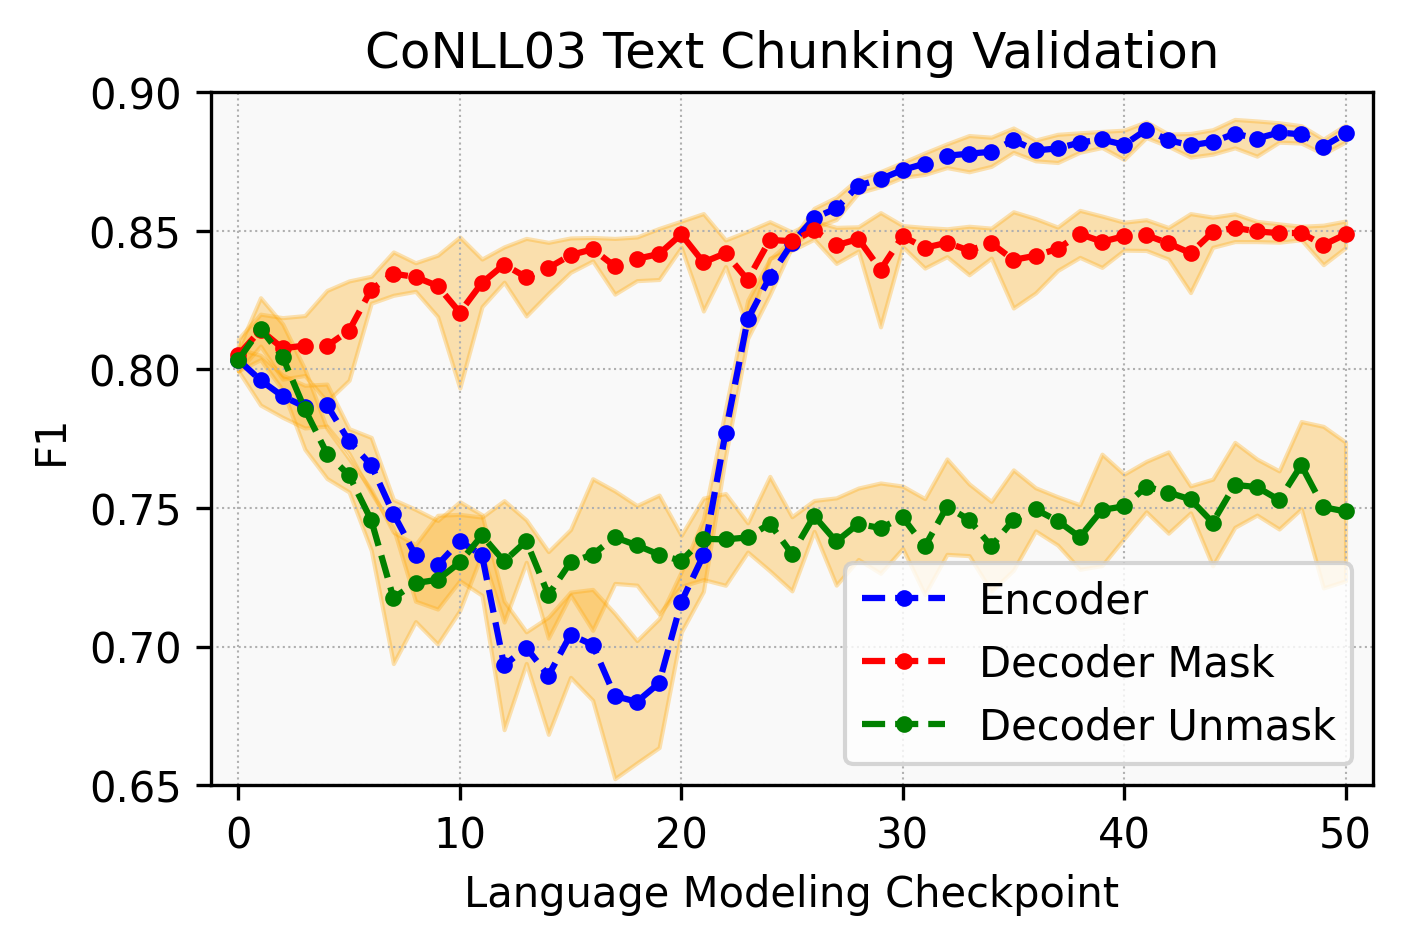

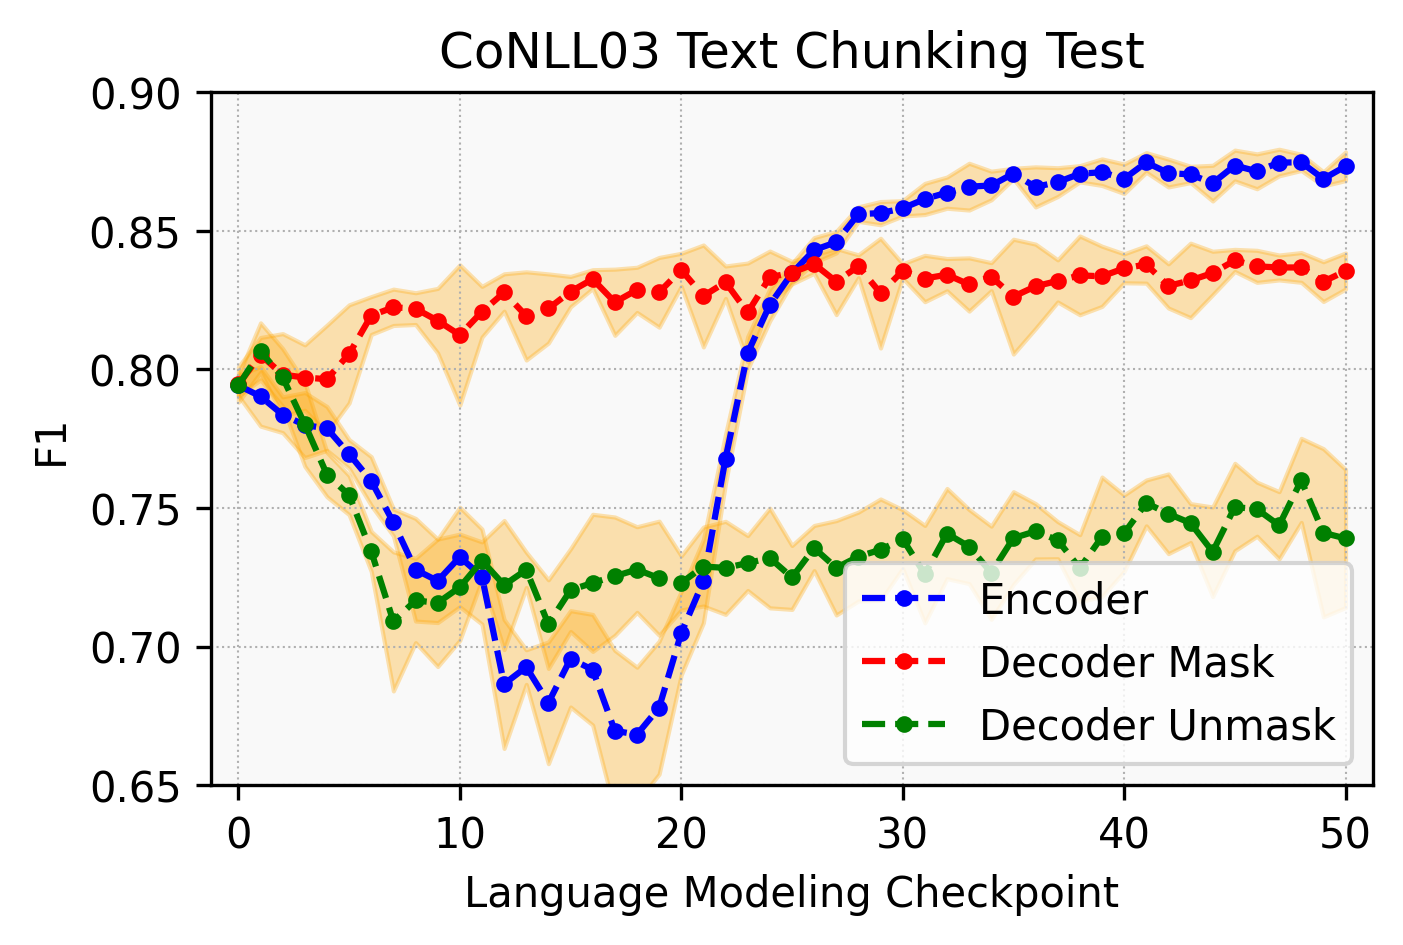

In [4]:
plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/3c1f87ol",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/crb3n974",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/bqh8m630",
    title="CoNLL03 Text Chunking Validation",
    bottom=0.65,
    top=0.9,
)

plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/f3ipf18b",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/p2bq8td3",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/wya1v442",
    title="CoNLL03 Text Chunking Test",
    bottom=0.65,
    top=0.9,
)

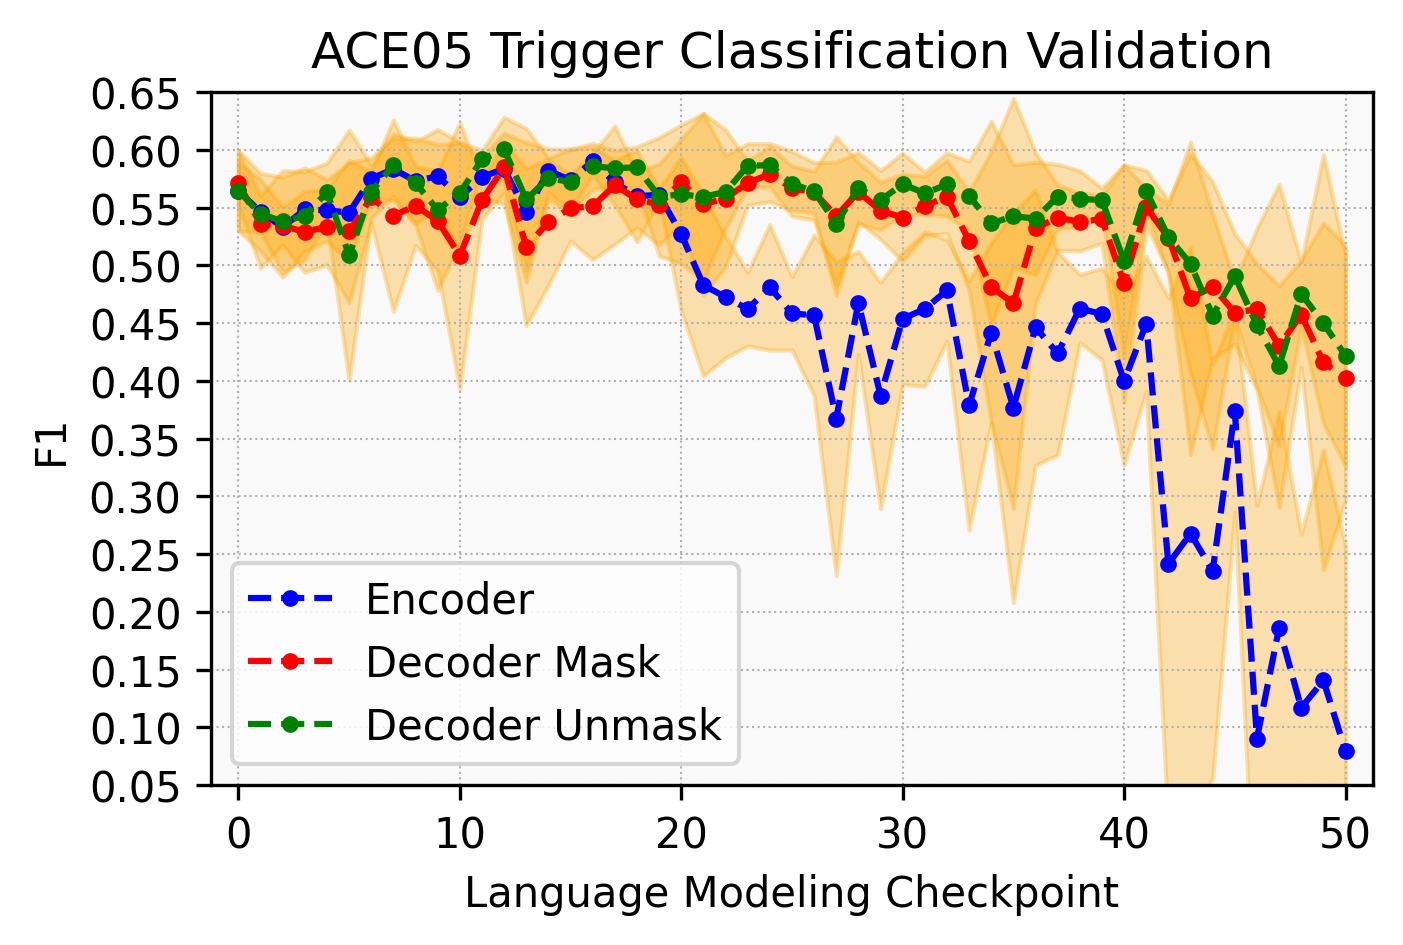

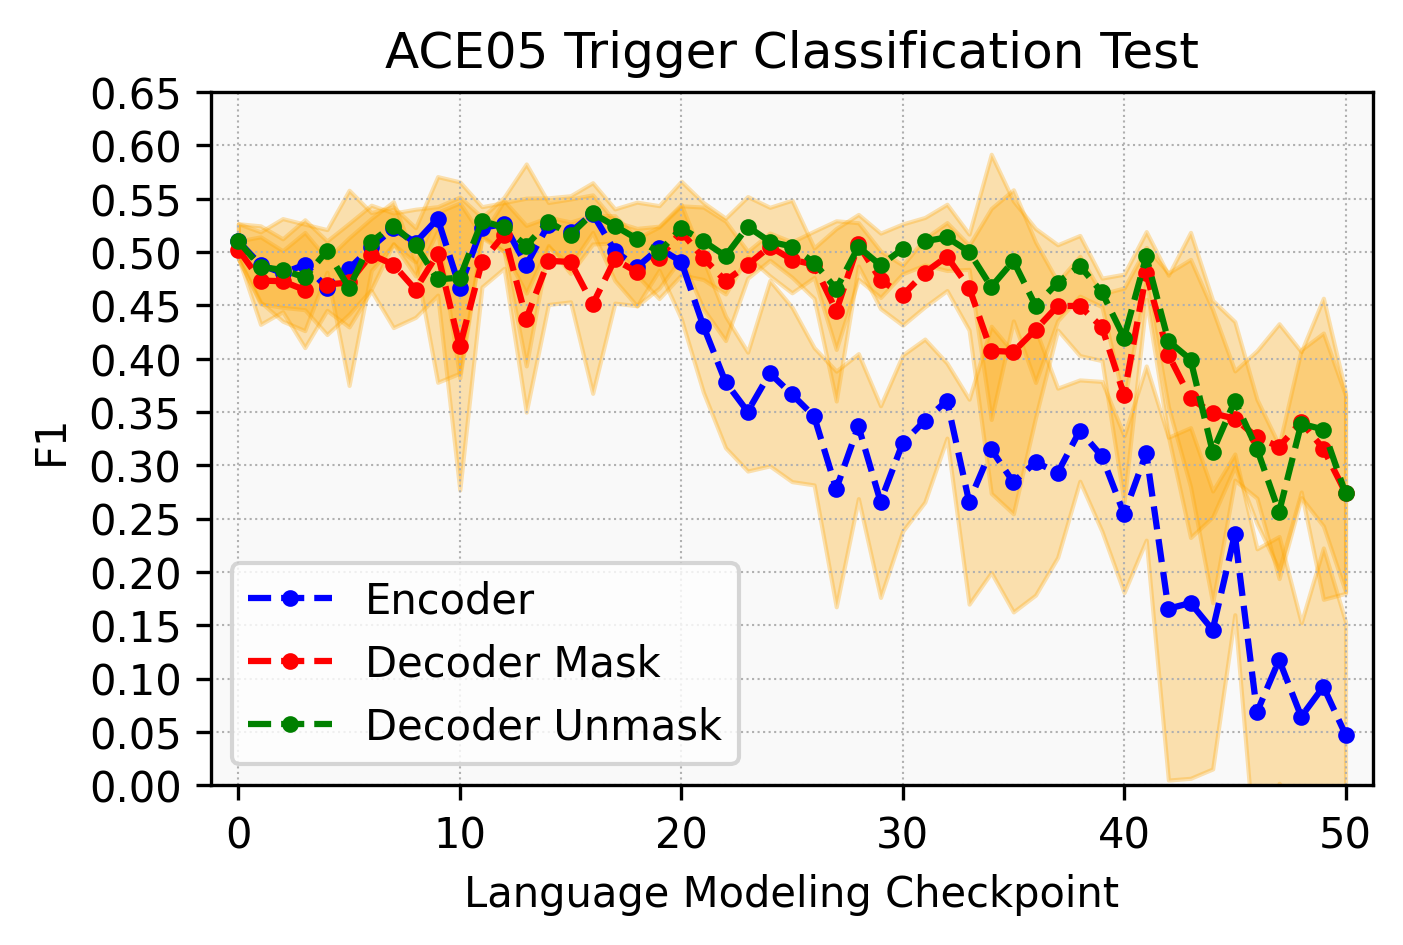

In [5]:
plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/6kwrb2zv",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/0uc8cn07",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/0yzccm8n",
    title="ACE05 Trigger Classification Validation",
    bottom=0.05,
    top=0.65,
)

plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/5kl3mvnd",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/1y1wlz4h",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/bo80t6gk",
    title="ACE05 Trigger Classification Test",
    bottom=0.0,
    top=0.65,
)

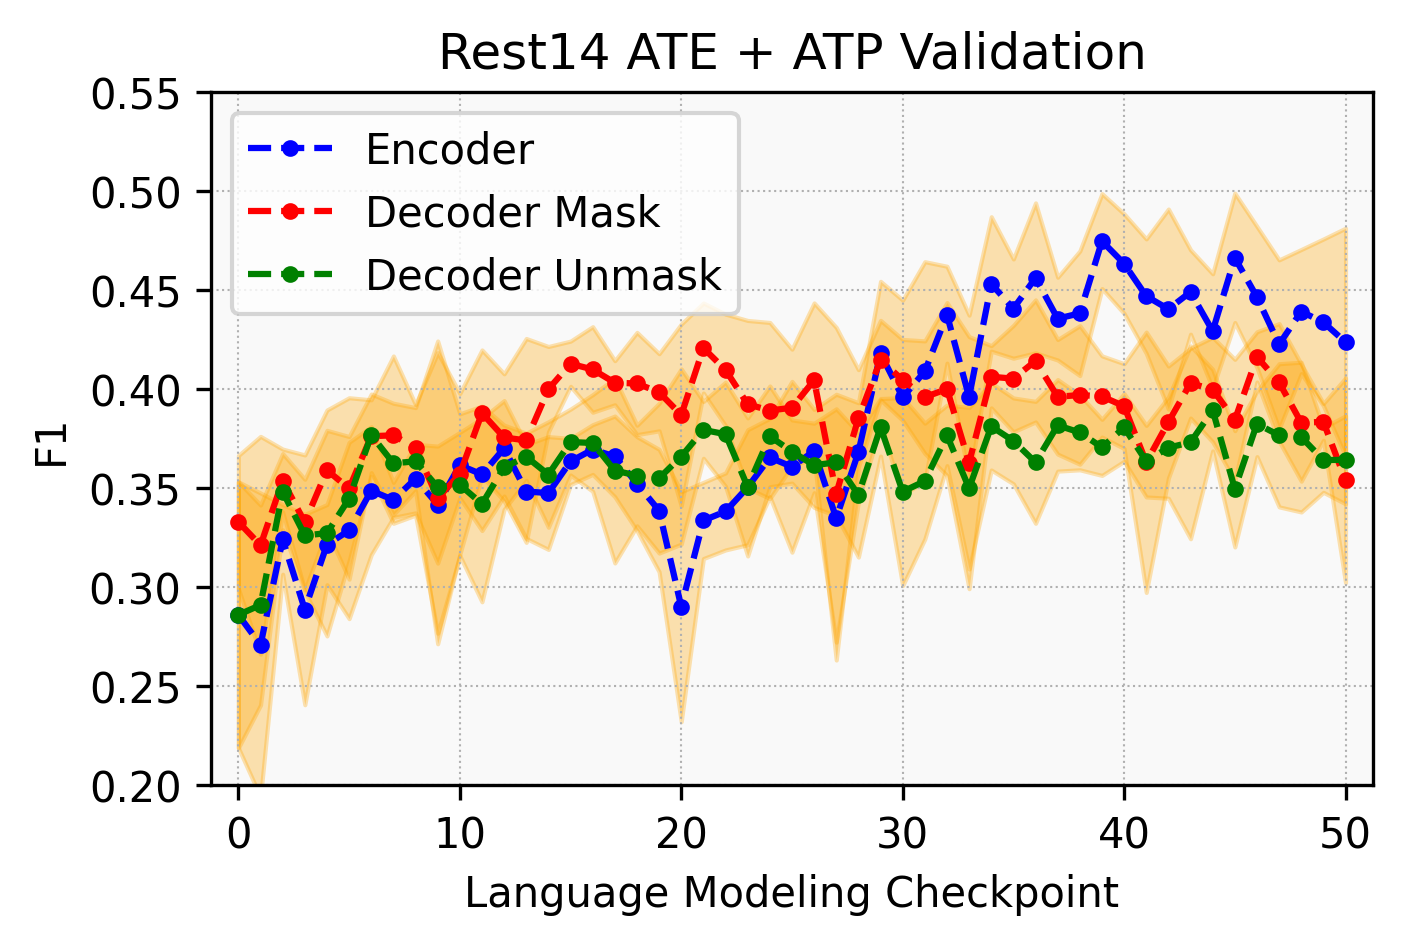

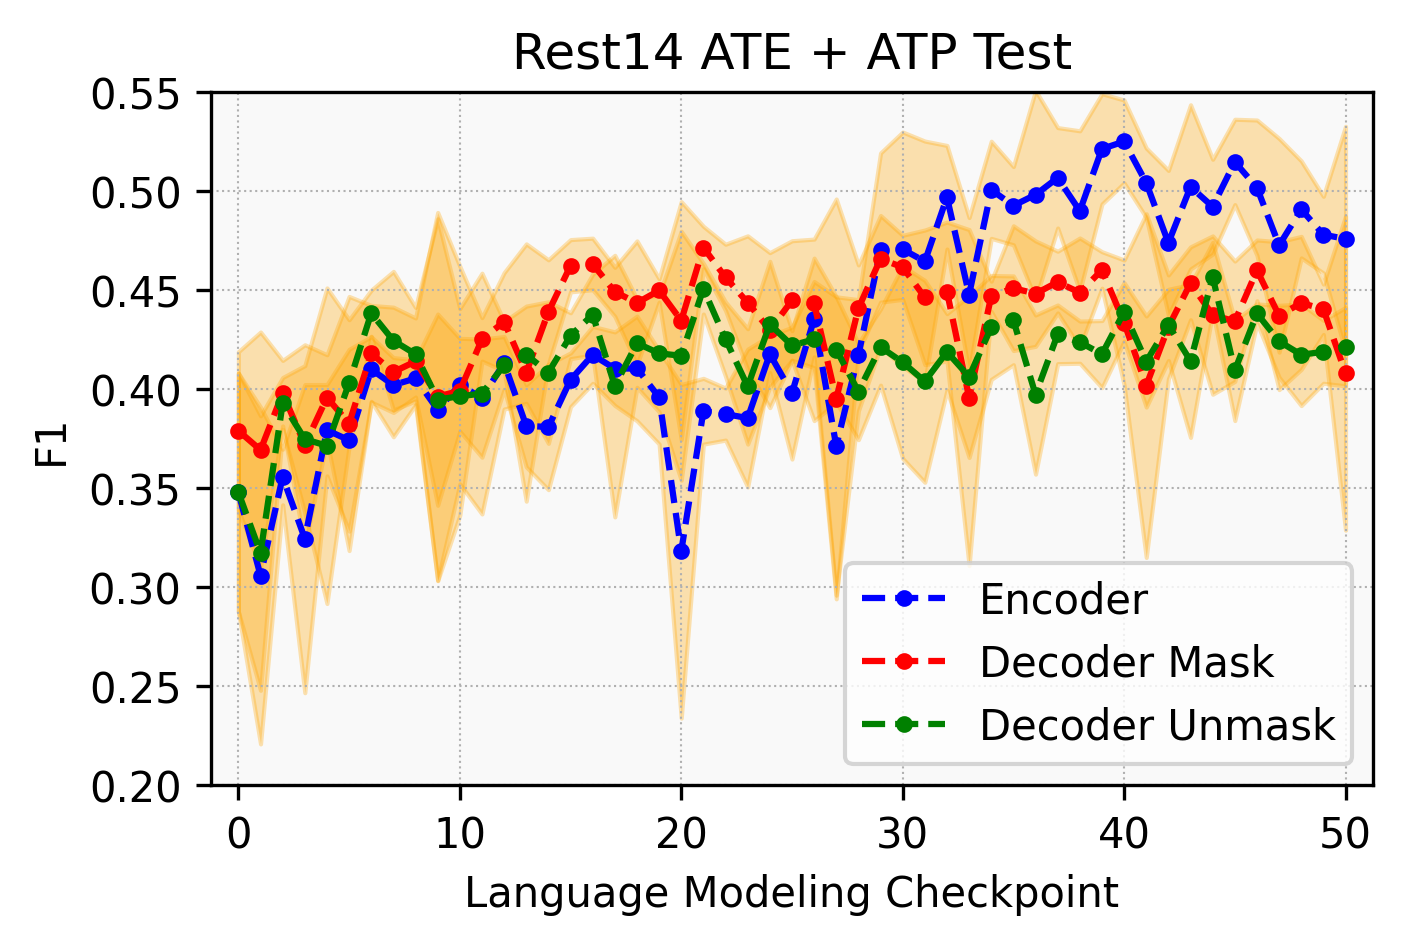

In [6]:
plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/aozz8kf9",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/wjnurh68",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/2bsb69bc",
    title="Rest14 ATE + ATP Validation",
    bottom=0.2,
    top=0.55,
)

plot_metric(
    "f1",
    url_encoder="https://wandb.ai/ddukic/generative-ie-paper/runs/82e65d14",
    url_decoder="https://wandb.ai/ddukic/generative-ie-paper/runs/gsb1fgo9",
    url_decoder_unlock="https://wandb.ai/ddukic/generative-ie-paper/runs/qv5ga9c2",
    title="Rest14 ATE + ATP Test",
    bottom=0.2,
    top=0.55,
)